In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
happy completed
neutral completed
sad completed


In [5]:
print(train)

                              image  label
0          images/train\angry\0.jpg  angry
1          images/train\angry\1.jpg  angry
2         images/train\angry\10.jpg  angry
3      images/train\angry\10002.jpg  angry
4      images/train\angry\10016.jpg  angry
...                             ...    ...
21072     images/train\sad\9966.jpg    sad
21073     images/train\sad\9974.jpg    sad
21074     images/train\sad\9976.jpg    sad
21075     images/train\sad\9986.jpg    sad
21076     images/train\sad\9997.jpg    sad

[21077 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
happy completed
neutral completed
sad completed


In [7]:
print(test)

                            image  label
0     images/test\angry\10052.jpg  angry
1     images/test\angry\10065.jpg  angry
2     images/test\angry\10079.jpg  angry
3     images/test\angry\10095.jpg  angry
4     images/test\angry\10121.jpg  angry
...                           ...    ...
5135     images/test\sad\9864.jpg    sad
5136      images/test\sad\987.jpg    sad
5137     images/test\sad\9885.jpg    sad
5138     images/test\sad\9889.jpg    sad
5139     images/test\sad\9923.jpg    sad

[5140 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/21077 [00:00<?, ?it/s]

C:\Users\saiki\miniconda3\envs\tensorflowgpu\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/5140 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 4)
y_test = to_categorical(y_test,num_classes = 4)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(4, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 300, validation_data = (x_test,y_test)) 

Epoch 1/300
165/165 [==============================] - 36s 129ms/step - loss: 1.3657 - accuracy: 0.3352 - val_loss: 1.3486 - val_accuracy: 0.3650
Epoch 2/300
165/165 [==============================] - 18s 111ms/step - loss: 1.3340 - accuracy: 0.3649 - val_loss: 1.2735 - val_accuracy: 0.4181
Epoch 3/300
165/165 [==============================] - 19s 113ms/step - loss: 1.2512 - accuracy: 0.4326 - val_loss: 1.1110 - val_accuracy: 0.5161
Epoch 4/300
165/165 [==============================] - 19s 117ms/step - loss: 1.1383 - accuracy: 0.4967 - val_loss: 1.0196 - val_accuracy: 0.5623
Epoch 5/300
165/165 [==============================] - 19s 114ms/step - loss: 1.0820 - accuracy: 0.5267 - val_loss: 0.9742 - val_accuracy: 0.5782
Epoch 6/300
165/165 [==============================] - 18s 112ms/step - loss: 1.0353 - accuracy: 0.5506 - val_loss: 0.9594 - val_accuracy: 0.5866
Epoch 7/300
165/165 [==============================] - 18s 110ms/step - loss: 1.0107 - accuracy: 0.5633 - val_loss: 0.9460 -

Epoch 57/300
165/165 [==============================] - 20s 122ms/step - loss: 0.5947 - accuracy: 0.7674 - val_loss: 0.7641 - val_accuracy: 0.7021
Epoch 58/300
165/165 [==============================] - 20s 121ms/step - loss: 0.5970 - accuracy: 0.7686 - val_loss: 0.7627 - val_accuracy: 0.7072
Epoch 59/300
165/165 [==============================] - 20s 121ms/step - loss: 0.5812 - accuracy: 0.7730 - val_loss: 0.7718 - val_accuracy: 0.7068
Epoch 60/300
165/165 [==============================] - 20s 123ms/step - loss: 0.5799 - accuracy: 0.7754 - val_loss: 0.7614 - val_accuracy: 0.7047
Epoch 61/300
165/165 [==============================] - 21s 125ms/step - loss: 0.5779 - accuracy: 0.7734 - val_loss: 0.7608 - val_accuracy: 0.7029
Epoch 62/300
165/165 [==============================] - 21s 125ms/step - loss: 0.5691 - accuracy: 0.7726 - val_loss: 0.7602 - val_accuracy: 0.6984
Epoch 63/300
165/165 [==============================] - 21s 124ms/step - loss: 0.5743 - accuracy: 0.7754 - val_loss: 0

Epoch 113/300
165/165 [==============================] - 15s 88ms/step - loss: 0.4044 - accuracy: 0.8487 - val_loss: 0.8431 - val_accuracy: 0.6914
Epoch 114/300
165/165 [==============================] - 15s 88ms/step - loss: 0.4007 - accuracy: 0.8481 - val_loss: 0.8451 - val_accuracy: 0.7014
Epoch 115/300
165/165 [==============================] - 15s 88ms/step - loss: 0.3998 - accuracy: 0.8514 - val_loss: 0.7982 - val_accuracy: 0.7027
Epoch 116/300
165/165 [==============================] - 14s 88ms/step - loss: 0.3938 - accuracy: 0.8552 - val_loss: 0.8345 - val_accuracy: 0.7023
Epoch 117/300
165/165 [==============================] - 15s 88ms/step - loss: 0.3868 - accuracy: 0.8562 - val_loss: 0.8443 - val_accuracy: 0.6996
Epoch 118/300
165/165 [==============================] - 15s 88ms/step - loss: 0.3835 - accuracy: 0.8578 - val_loss: 0.8201 - val_accuracy: 0.7006
Epoch 119/300
165/165 [==============================] - 15s 92ms/step - loss: 0.3855 - accuracy: 0.8549 - val_loss: 0

Epoch 169/300
165/165 [==============================] - 15s 92ms/step - loss: 0.3021 - accuracy: 0.8929 - val_loss: 0.8903 - val_accuracy: 0.7033
Epoch 170/300
165/165 [==============================] - 15s 92ms/step - loss: 0.3034 - accuracy: 0.8913 - val_loss: 0.8884 - val_accuracy: 0.7076
Epoch 171/300
165/165 [==============================] - 15s 92ms/step - loss: 0.2992 - accuracy: 0.8904 - val_loss: 0.8987 - val_accuracy: 0.7012
Epoch 172/300
165/165 [==============================] - 15s 92ms/step - loss: 0.2960 - accuracy: 0.8931 - val_loss: 0.8846 - val_accuracy: 0.7070
Epoch 173/300
165/165 [==============================] - 15s 92ms/step - loss: 0.3008 - accuracy: 0.8913 - val_loss: 0.8955 - val_accuracy: 0.7002
Epoch 174/300
165/165 [==============================] - 15s 92ms/step - loss: 0.2993 - accuracy: 0.8909 - val_loss: 0.8719 - val_accuracy: 0.7019
Epoch 175/300
165/165 [==============================] - 15s 92ms/step - loss: 0.2914 - accuracy: 0.8978 - val_loss: 0

Epoch 225/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2450 - accuracy: 0.9135 - val_loss: 0.9690 - val_accuracy: 0.6942
Epoch 226/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2509 - accuracy: 0.9163 - val_loss: 0.9267 - val_accuracy: 0.7025
Epoch 227/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2496 - accuracy: 0.9128 - val_loss: 0.9287 - val_accuracy: 0.6944
Epoch 228/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2470 - accuracy: 0.9121 - val_loss: 0.9466 - val_accuracy: 0.6998
Epoch 229/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2354 - accuracy: 0.9166 - val_loss: 0.9807 - val_accuracy: 0.6951
Epoch 230/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2346 - accuracy: 0.9171 - val_loss: 0.9489 - val_accuracy: 0.6965
Epoch 231/300
165/165 [==============================] - 14s 87ms/step - loss: 0.2322 - accuracy: 0.9170 - val_loss: 0

Epoch 281/300
165/165 [==============================] - 14s 88ms/step - loss: 0.2165 - accuracy: 0.9245 - val_loss: 1.0120 - val_accuracy: 0.6990
Epoch 282/300
165/165 [==============================] - 15s 88ms/step - loss: 0.2212 - accuracy: 0.9252 - val_loss: 0.9385 - val_accuracy: 0.7014
Epoch 283/300
165/165 [==============================] - 14s 88ms/step - loss: 0.2098 - accuracy: 0.9277 - val_loss: 0.9834 - val_accuracy: 0.6922
Epoch 284/300
165/165 [==============================] - 14s 88ms/step - loss: 0.2106 - accuracy: 0.9279 - val_loss: 1.0280 - val_accuracy: 0.6984
Epoch 285/300
165/165 [==============================] - 14s 88ms/step - loss: 0.2054 - accuracy: 0.9284 - val_loss: 0.9877 - val_accuracy: 0.6984
Epoch 286/300
165/165 [==============================] - 15s 88ms/step - loss: 0.2124 - accuracy: 0.9265 - val_loss: 0.9878 - val_accuracy: 0.6986
Epoch 287/300
165/165 [==============================] - 15s 88ms/step - loss: 0.2065 - accuracy: 0.9285 - val_loss: 0

In [20]:
model_json = model.to_json()
with open("emotiondetector2.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector2.h5")

In [21]:
from keras.models import model_from_json

In [22]:
json_file = open("emotiondetector2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector2.h5")

In [23]:
label = ['angry','happy','neutral','sad']

In [24]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry


C:\Users\saiki\miniconda3\envs\tensorflowgpu\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 1s 583ms/step
model prediction is  angry


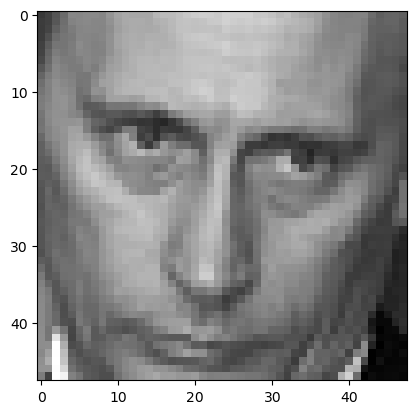

In [26]:
image = 'images/train/angry/56.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 [==============================] - 0s 21ms/step
model prediction is  sad


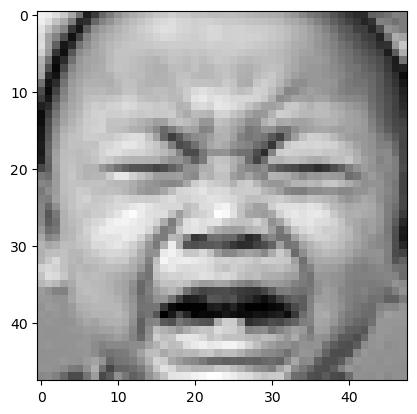

In [27]:
image = 'images/train/sad/130.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 21ms/step
model prediction is  happy


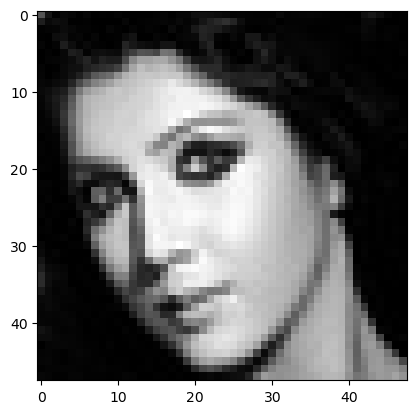

In [28]:
image = 'images/train/happy/114.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [2]:
import cv2
from keras.models import model_from_json
import numpy as np

In [3]:
json_file = open("emotiondetector2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

In [4]:
model.load_weights("emotiondetector2.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

In [5]:
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1: 'happy', 2: 'neutral', 3:'sad'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 28ms/step
